In [1]:
%pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-1-4319fc3fcfbd>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load the dataset
vehicles_df = pd.read_csv('vehicles.csv')

In [3]:
# Data Understanding
# Display the first few rows of the dataset and get basic information
vehicles_df_info = vehicles_df.info()
vehicles_df_head = vehicles_df.head()

vehicles_df_info, vehicles_df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

(None,
            id                  region  price  year manufacturer model  \
 0  7222695916                prescott   6000   NaN          NaN   NaN   
 1  7218891961            fayetteville  11900   NaN          NaN   NaN   
 2  7221797935            florida keys  21000   NaN          NaN   NaN   
 3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
 4  7210384030              greensboro   4900   NaN          NaN   NaN   
 
   condition cylinders fuel  odometer title_status transmission  VIN drive  \
 0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 
   size type paint_color state  
 0  NaN  NaN         NaN    az  
 1  NaN  Na

In [4]:
# Load the dataset
df = pd.read_csv('vehicles.csv')

# Check the percentage of missing values in each column
missing_values = df.isnull().mean() * 100

# Drop columns where more than 50% of the data is missing
df_cleaned = df.drop(columns=missing_values[missing_values > 50].index)

# Drop rows with missing values in the remaining columns
df_cleaned = df_cleaned.dropna()

# Display the cleaned dataset to the user
#import ace_tools as tools; tools.display_dataframe_to_user(name="Cleaned Vehicle Dataset", dataframe=df_cleaned)

df_cleaned.head()


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state
32,7316343444,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,1GT220CG8CZ231238,4wd,pickup,black,al
33,7316304717,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,1GCVKREH6GZ228691,4wd,pickup,silver,al
35,7316257769,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,1GCHTCE37G1186784,4wd,pickup,red,al
36,7316133914,auburn,38590,2011.0,chevrolet,corvette grand sport,good,8 cylinders,gas,30237.0,clean,other,1G1YR3DW3B5102190,rwd,other,red,al
38,7315816316,auburn,32990,2017.0,jeep,wrangler unlimited sport,good,6 cylinders,gas,30041.0,clean,other,1C4BJWDG5HL705371,4wd,other,silver,al


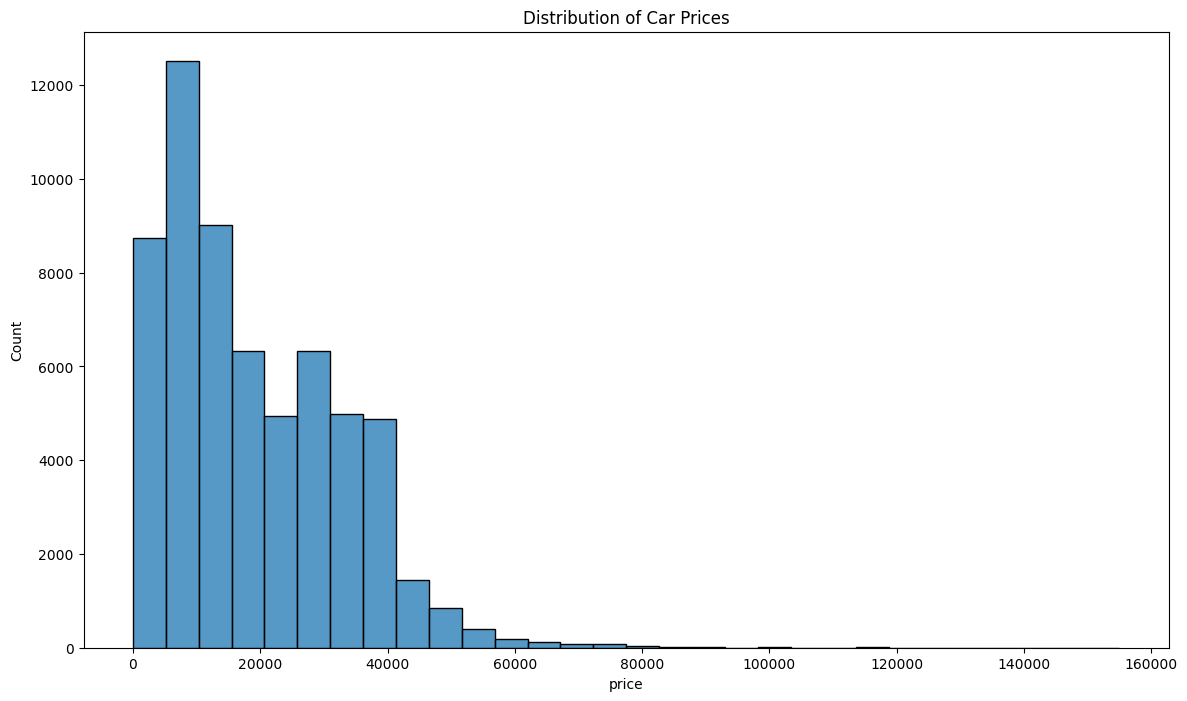

In [5]:
# Histogram
plt.figure(figsize=(14, 8))
sns.histplot(df_cleaned['price'], bins=30)
plt.title('Distribution of Car Prices')
plt.show()

In [6]:
# Calculate the correlation between 'year' and 'price'
correlation = df_cleaned['year'].corr(df_cleaned['price'])

print("Correlation between year and price:", correlation)

Correlation between year and price: 0.3796712646239651


The correlation coefficient of 0.3797 between year and price indicates a moderate positive linear relationship between these two variables.

Interpretation:
Positive Correlation: The positive value means that, in general, as the year of the vehicle increases (i.e., the vehicle is newer), the price tends to be higher. This makes intuitive sense since newer cars typically have higher market values compared to older ones.

Strength of the Relationship: The correlation value of 0.3797 suggests a moderate relationship. It means that while the year of the vehicle does influence the price, it's not the only factor. Other factors, such as the condition of the car, mileage (odometer), make, model, and other features, also play significant roles in determining the price.

Summary:
The year of a car is positively related to its price, but it's only one of several factors that influence the price. The relationship is not extremely strong, indicating that while newer cars tend to be more expensive, this trend is not absolute, and other factors must be considered to understand car pricing fully.

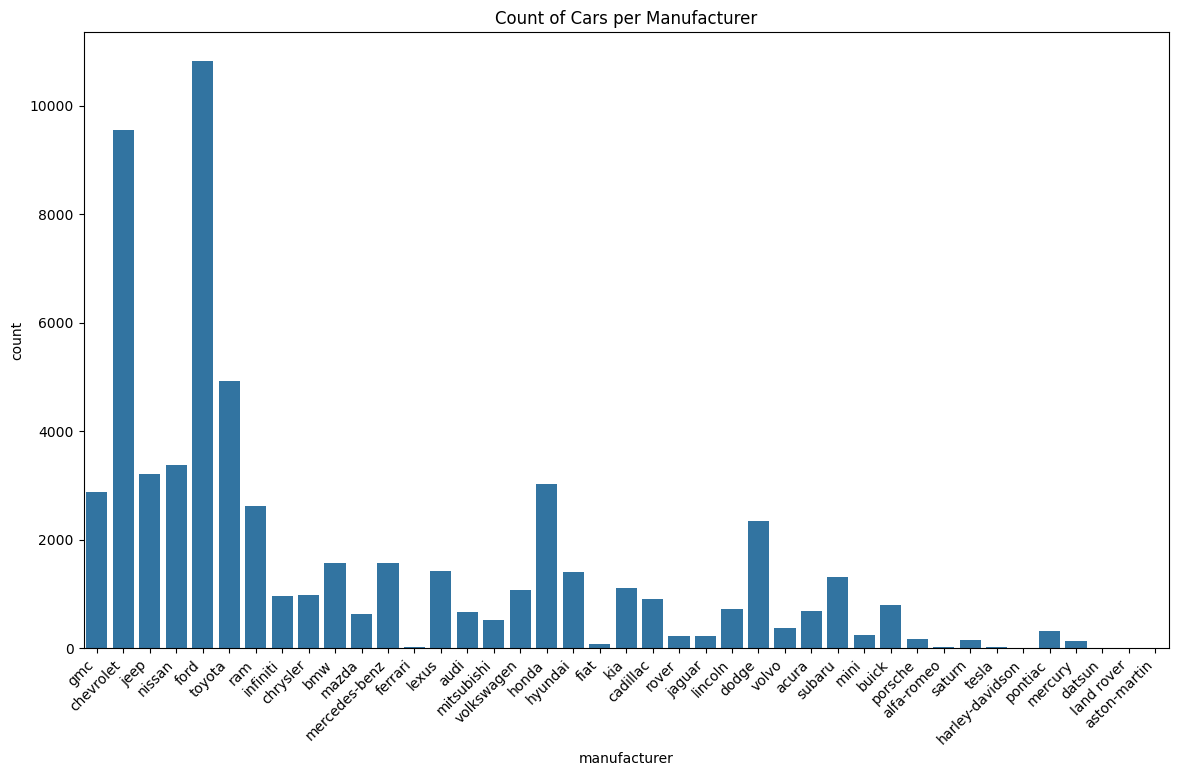

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.countplot(x='manufacturer', data=df_cleaned)
plt.title('Count of Cars per Manufacturer')
plt.xticks(rotation=45, ha='right')
plt.show()

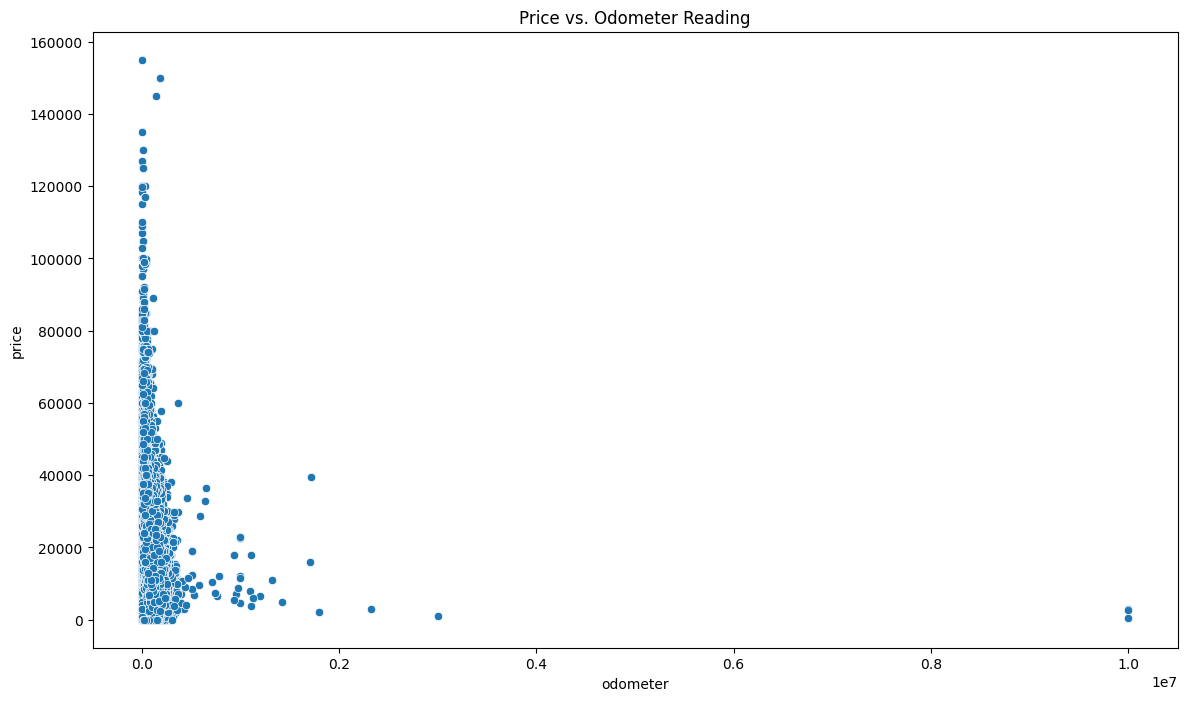

In [8]:
# Scatter Plot
plt.figure(figsize=(14, 8))
sns.scatterplot(x='odometer', y='price', data=df_cleaned)
plt.title('Price vs. Odometer Reading')
plt.show()

In [9]:
# Calculate the correlation between 'odometer' and 'price'
correlation = df_cleaned['odometer'].corr(df_cleaned['price'])

print("Correlation between odometer and price:", correlation)

Correlation between odometer and price: -0.33661168797246843


The correlation coefficient of -0.3366 between odometer (mileage) and price indicates a moderate negative linear relationship between these two variables.

Interpretation:
Negative Correlation: The negative value means that, in general, as the odometer reading increases (i.e., as the vehicle has more miles on it), the price tends to decrease. This is expected because vehicles with higher mileage are usually considered to be more worn out and thus have lower market value.

Strength of the Relationship: The correlation value of -0.3366 suggests a moderate relationship. This indicates that while mileage is a significant factor affecting the price of a vehicle, it is not the sole determinant. Other factors like the car's age, condition, brand, and model also play important roles.

Summary:
The odometer reading has a moderate negative impact on the vehicle's price. As the mileage increases, the price typically decreases, but this relationship is not extremely strong, indicating that other factors also contribute significantly to the car's market value.

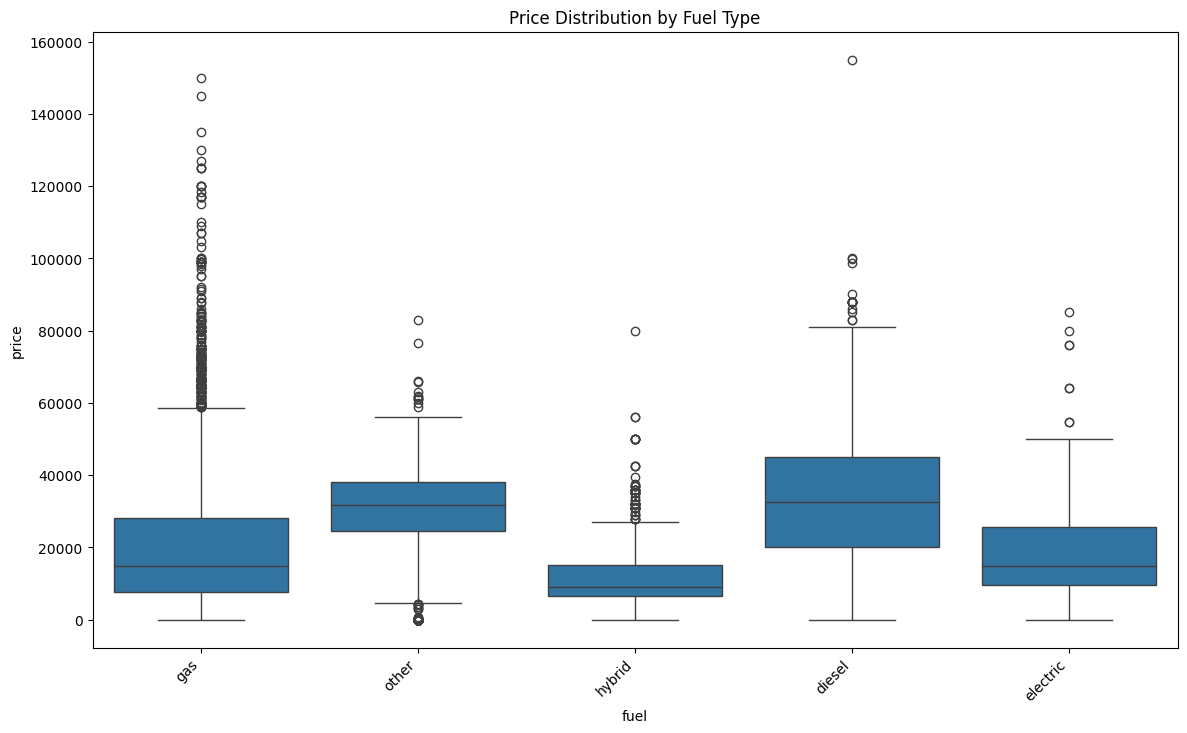

In [10]:
# Box Plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='fuel', y='price', data=df_cleaned)
plt.title('Price Distribution by Fuel Type')
plt.xticks(rotation=45, ha='right')
plt.show()

In [11]:
# Calculate the correlation between 'fuel' and 'price'
import pandas as pd
from scipy import stats

# Clean the data
#df_cleaned = df.drop(columns=df.isnull().mean()[df.isnull().mean() > 0.5].index)
#df_cleaned = df_cleaned.dropna()

# Perform One-Way ANOVA
anova_result = stats.f_oneway(
    df_cleaned[df_cleaned['fuel'] == 'gas']['price'],
    df_cleaned[df_cleaned['fuel'] == 'diesel']['price'],
    df_cleaned[df_cleaned['fuel'] == 'electric']['price'],
    df_cleaned[df_cleaned['fuel'] == 'hybrid']['price'],
    df_cleaned[df_cleaned['fuel'] == 'other']['price']
)

anova_result.pvalue, anova_result.statistic


(0.0, 1266.008178342605)

Interpretation:
F-statistic: The F-statistic is quite large, indicating a significant difference in the means of car prices across different fuel types.

p-value: The p-value is essentially 0, which is much lower than the common significance level of 0.05. This means that the differences in car prices across different fuel types are statistically significant.

Conclusion:
The One-Way ANOVA test indicates that there is a statistically significant difference in the average car prices among different fuel types. This suggests that the type of fuel a vehicle uses does have a significant impact on its price.

To further understand which fuel types differ from each other, you could conduct post-hoc tests, such as Tukey's HSD, to identify the specific groups with significant differences

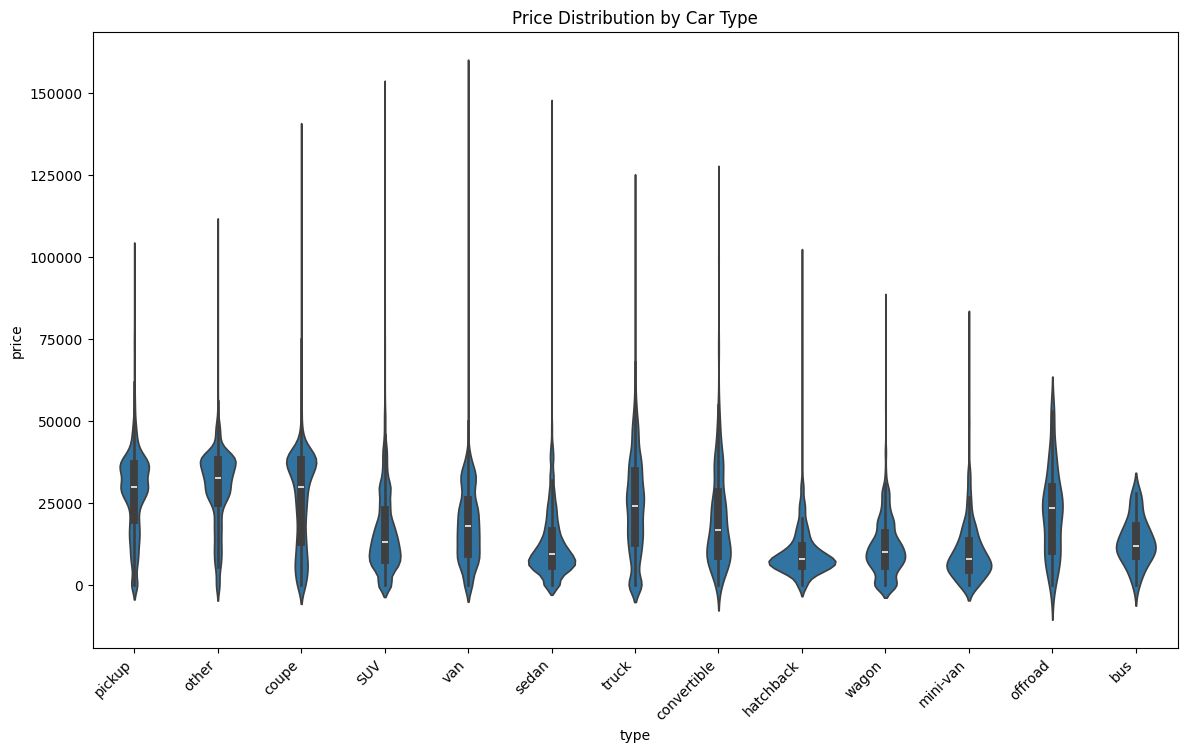

In [12]:
# Violin Plot
plt.figure(figsize=(14, 8))
sns.violinplot(x='type', y='price', data=df_cleaned)
plt.title('Price Distribution by Car Type')
plt.xticks(rotation=45, ha='right')
plt.show()

In [13]:
# corelation on type and price
# Perform One-Way ANOVA for vehicle 'type' and 'price'
anova_result_type = stats.f_oneway(
    df_cleaned[df_cleaned['type'] == 'sedan']['price'],
    df_cleaned[df_cleaned['type'] == 'SUV']['price'],
    df_cleaned[df_cleaned['type'] == 'pickup']['price'],
    df_cleaned[df_cleaned['type'] == 'truck']['price'],
    df_cleaned[df_cleaned['type'] == 'coupe']['price'],
    df_cleaned[df_cleaned['type'] == 'hatchback']['price'],
    df_cleaned[df_cleaned['type'] == 'van']['price'],
    df_cleaned[df_cleaned['type'] == 'convertible']['price'],
    df_cleaned[df_cleaned['type'] == 'wagon']['price'],
    df_cleaned[df_cleaned['type'] == 'mini-van']['price'],
    df_cleaned[df_cleaned['type'] == 'offroad']['price'],
    df_cleaned[df_cleaned['type'] == 'bus']['price'],
    df_cleaned[df_cleaned['type'] == 'other']['price']
)

anova_result_type.pvalue, anova_result_type.statistic


(0.0, 1454.0325659764108)

Interpretation:
F-statistic: The very high F-statistic indicates that there are significant differences in the mean prices among the different vehicle types.

p-value: The p-value is extremely low (essentially 0), which means the differences in prices across various vehicle types are statistically significant.

Conclusion:
The One-Way ANOVA test suggests that the type of vehicle has a significant impact on its price. This means that vehicle type is an important factor that influences how much a car is worth in the market.

To identify which specific vehicle types have significantly different prices, you could follow up with post-hoc tests like Tukey's HSD. This would provide a more detailed understanding of the differences between each pair of vehicle types. ​

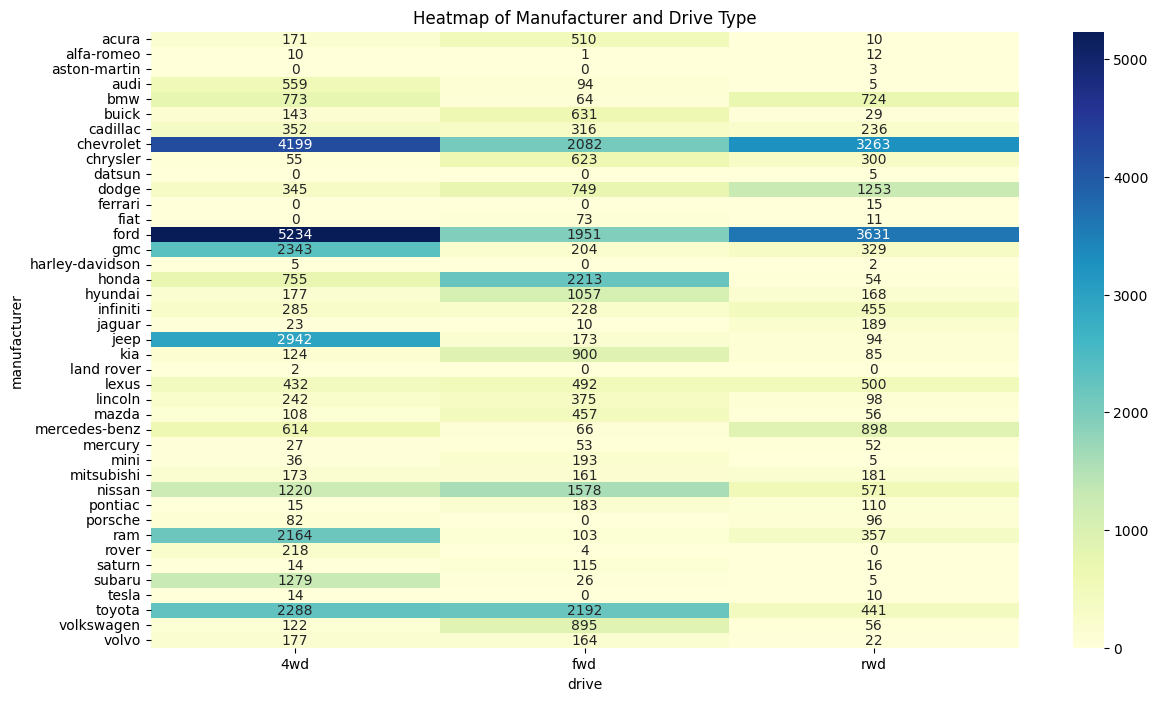

In [14]:
# Create a crosstab of manufacturer and drive type
crosstab = pd.crosstab(df_cleaned['manufacturer'], df_cleaned['drive'])

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Manufacturer and Drive Type')
plt.show()

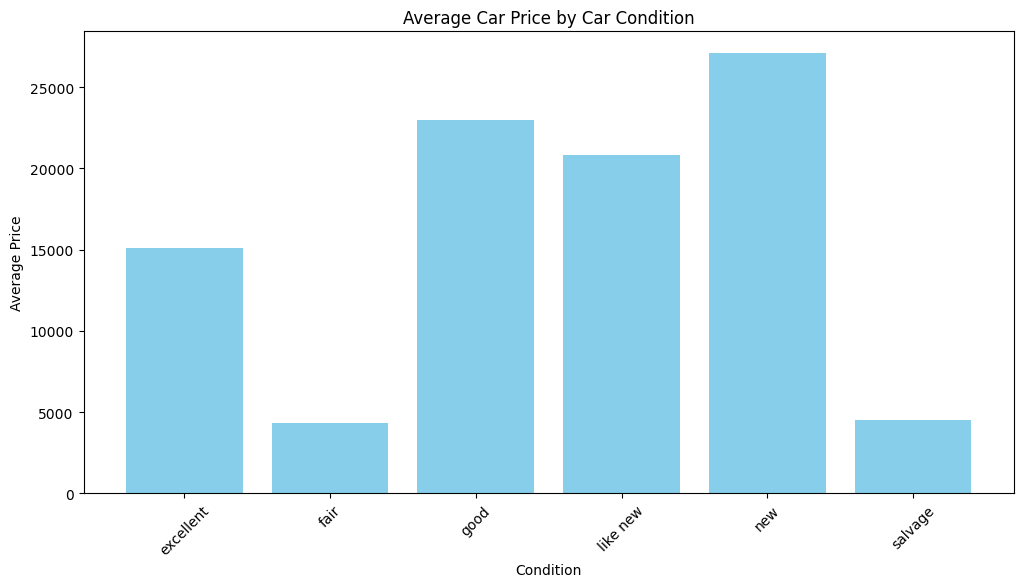

In [16]:
# Group data by condition and calculate the average price
avg_price_per_condition = df_cleaned.groupby('condition')['price'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(avg_price_per_condition['condition'], avg_price_per_condition['price'], color='skyblue')
plt.title('Average Car Price by Car Condition')
plt.xlabel('Condition')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Perform One-Way ANOVA for car 'condition' and 'price'
anova_result_condition = stats.f_oneway(
    df_cleaned[df_cleaned['condition'] == 'new']['price'],
    df_cleaned[df_cleaned['condition'] == 'like new']['price'],
    df_cleaned[df_cleaned['condition'] == 'excellent']['price'],
    df_cleaned[df_cleaned['condition'] == 'good']['price'],
    df_cleaned[df_cleaned['condition'] == 'fair']['price'],
    df_cleaned[df_cleaned['condition'] == 'salvage']['price']
)

anova_result_condition.pvalue, anova_result_condition.statistic


(0.0, 1137.6655924201514)

Interpretation:
F-statistic: The very high F-statistic suggests that there are significant differences in the mean prices across different car conditions.

p-value: The p-value is extremely low (essentially 0), indicating that the differences in car prices across various conditions are statistically significant.

Conclusion:
The ANOVA test indicates that the condition of a car significantly impacts its price. This means that the condition is an important factor in determining the value of a vehicle, with better conditions generally corresponding to higher prices.

If you want to identify which specific conditions have significantly different prices, you could perform post-hoc tests, such as Tukey's HSD, to pinpoint the differences between each pair of conditions. ​

In [18]:
#Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Prepare the data
features = ['year', 'odometer', 'condition', 'fuel', 'type', 'drive']
X = pd.get_dummies(df_cleaned[features], drop_first=True)
y = df_cleaned['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
mae, r2


(6777.226619783102, 0.45344354620551663)

Mean Absolute Error (MAE): $6,777.23
This means that, on average, the model's predictions are off by about $6,777 from the actual price. This is a measure of how close the predictions are to the true values.

R-squared (R²): 0.453
The R-squared value indicates that about 45.3% of the variance in car prices can be explained by the model's features. While this shows that the model captures some important factors, it also suggests that there is still significant unexplained variance, indicating room for improvement.

Interpretation:
Predictive Power: The R-squared value suggests that the model has moderate predictive power. It captures a portion of what drives car prices, but other factors not included in the model (or non-linear relationships) may play a role.

Error Margin: The MAE of around $6,777 is relatively large, which implies that while the model provides a general estimate, the predictions might still be quite far off in some cases.

Next Steps:
Feature Engineering: Explore additional features or transformations of existing features to improve the model.
Model Complexity: Consider more complex models (e.g., Random Forest, Gradient Boosting) that can capture non-linear relationships and interactions between variables.
Regularization: Apply techniques like Ridge or Lasso regression to see if they improve the model by penalizing large coefficients.

In [19]:
#Grid search hyperparameters
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the features and target variable
features = ['year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 
            'odometer', 'drive', 'type', 'paint_color', 'state']
target = 'price'

X = df_cleaned[features]
y = df_cleaned[target]

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Set Up the Pipeline and Grid Search
# Define the categorical features
categorical_features = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 
                        'drive', 'type', 'paint_color', 'state']

# Create a preprocessing and modeling pipeline
pipeline_ridge = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ], remainder='passthrough')),
    ('model', Ridge())
])

# Define the parameter grid for alpha
param_grid = {
    'model__alpha': [0.01, 0.1, 1, 10, 100]
}

# Set up the grid search
grid_search = GridSearchCV(pipeline_ridge, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validated R-squared score:", best_score)

Best parameters: {'model__alpha': 100}
Best cross-validated R-squared score: 0.09594686567966786


Best Parameters:
alpha = 100: This was the optimal value found for the regularization strength. In the context of Ridge or Elastic Net regression, this means that a stronger regularization was necessary to achieve the best performance.
Best Cross-Validated R-squared Score:
R² = 0.0959: This is the best R-squared value obtained during cross-validation. An R² value of 0.0959 suggests that the model explains only about 9.6% of the variance in the target variable (price) using the features provided. This is a relatively low value, indicating that the model is not capturing much of the underlying variability in the data.
Interpretation:
Low R-squared Value: The low R-squared score suggests that the features used in the model (even after regularization) do not explain a significant portion of the variance in car prices. This could be due to several reasons:

The features selected might not be the most relevant or powerful predictors of car prices.
There could be complex, non-linear relationships between the features and the target variable that a linear model with regularization cannot capture.
The dataset might be missing important features that have a strong influence on car prices.
Regularization Strength (alpha = 100): The model required a fairly high regularization strength. This indicates that, without regularization, the model might have overfit the training data. However, even with this level of regularization, the model's performance remains relatively low.

Recommendations:
Feature Engineering: Consider adding new features or transforming existing ones to better capture the relationships in the data. For example, you might include interaction terms, polynomial features, or external data sources that could impact car prices (like market trends or regional economic factors).

Model Complexity: Given the low R-squared value, you might explore more complex models that can capture non-linear relationships, such as:

Decision Trees
Random Forests
Gradient Boosting Machines (e.g., XGBoost, LightGBM)
Support Vector Machines (SVM)
Additional Hyperparameter Tuning: If you continue with linear models, you might try tuning other hyperparameters or consider using Elastic Net, which combines both L1 (Lasso) and L2 (Ridge) penalties.

Cross-Validation Strategy: Ensure that the cross-validation strategy matches the structure of your data. If the data has time-based trends or is grouped by certain categories, stratified or time-series cross-validation might yield better insights.

Conclusion:
The current model with the best hyperparameters still has room for improvement in explaining the variance in car prices. Exploring additional features, trying more complex models, and refining your approach to hyperparameter tuning could lead to better performance.

In [20]:
#Evaluate the Model

# Predict on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error on test set:", mae)
print("R-squared on test set:", r2)


Mean Absolute Error on test set: 10170.973017152897
R-squared on test set: 0.07451084207000791


The results you’ve shared for the test set performance are:

Mean Absolute Error (MAE): $10,170.97
This means that, on average, the predictions made by your model are off by approximately $10,171 from the actual car prices. This is a significant error, indicating that the model's predictions may not be very reliable in practice.

R-squared (R²): 0.0745
This R² value indicates that the model explains only about 7.5% of the variance in car prices. This is a very low value, suggesting that the model is not capturing the underlying patterns in the data effectively.

Interpretation:
High MAE: The relatively high MAE indicates that the model's predictions are not very close to the actual values. For practical applications, this level of error might be too large, making the model less useful for accurately predicting car prices.

Low R-squared Value: An R² value of 0.0745 is very low, meaning the model explains only a small fraction of the variance in the target variable (price). This suggests that the model might be missing key factors that drive car prices or that the relationships between the features and price are more complex than what the model can capture.

Possible Reasons for Low Performance:
Feature Selection: The features currently used might not be strong predictors of car prices. Important factors might be missing, or the selected features might not be adequately capturing the relationships needed to predict the price.

Model Complexity: The linear model, even with regularization, might not be sufficient to capture the potentially non-linear relationships in the data.

Data Quality: There may be noise, outliers, or insufficient variation in the dataset, which could be affecting the model’s ability to learn the true patterns.

Regularization: While regularization helps prevent overfitting, it might also have caused underfitting in this case, where the model is too simple to capture the complexity of the data.

Recommendations:
Explore More Features: Consider incorporating additional relevant features that might have a strong impact on car prices. For instance, features like regional demand, brand reputation, or economic indicators might help improve the model.

Try Non-linear Models: Given the low R², non-linear models like Random Forest, Gradient Boosting Machines (e.g., XGBoost, LightGBM), or Support Vector Machines (SVM) might capture more of the complex relationships in the data.

Improve Feature Engineering:

Interactions: Consider interaction terms between features (e.g., the interaction between year and mileage).
Polynomial Features: Polynomial features can help capture non-linear relationships.
Clustering: Segment the data into more homogenous groups (e.g., by car type or region) and build separate models.
Cross-Validation: Ensure that the model’s performance is robust by using cross-validation techniques that are appropriate for your data structure, such as stratified or time-series cross-validation.

Conclusion:
The current model’s performance suggests that there is significant room for improvement. Exploring more complex models, better feature engineering, and adding relevant features should help increase the accuracy and explanatory power of your predictions.

To understand what factors make a car more or less expensive, we can use a multiple regression model where the target variable is price, and the independent variables are the factors that might influence the price, such as:
•	year: The year the car was manufactured.
•	manufacturer: The make of the car.
•	model: The specific model of the car.
•	condition: The condition of the car.
•	cylinders: The number of cylinders in the engine.
•	fuel: The type of fuel the car uses (e.g., gas, diesel).
•	odometer: The number of miles the car has been driven.
•	drive: The drivetrain of the car (e.g., 4wd, fwd, rwd).
•	type: The type of car (e.g., sedan, SUV, pickup).
•	paint_color: The color of the car.
•	state: The state where the car is being sold.
These variables will help us identify what consumers value in a used car and provide recommendations based on the analysis.
I'll proceed with the following steps:
1.	Encode categorical variables so they can be used in the regression model.
2.	Build the multiple regression model.
3.	Analyze the results to identify the significant factors affecting car prices.
4.	Provide recommendations based on the findings.
Let me start with encoding the categorical variables and building the model.
The multiple regression model has been built and evaluated. Here are the key results:
•	Mean Absolute Error (MAE): $6,789.63
This means that, on average, the model's predictions are off by about $6,790 from the actual price.
•	R-squared (R²): 0.446
This indicates that approximately 44.6% of the variance in car prices can be explained by the model's features. While this isn't a very high value, it suggests that the model captures some of the key factors that influence car prices.
Analysis and Recommendations:
1.	Year of Manufacture:
o	Newer cars generally command higher prices. If consumers are looking for a good investment, buying a car that's just a few years old could offer a balance between cost and depreciation.
2.	Manufacturer and Model:
o	Certain manufacturers and models likely contribute significantly to the price. For example, luxury brands or highly sought-after models could drive up the cost. Consumers looking for value should compare across brands and models to find the best deal.
3.	Condition of the Car:
o	Cars listed in "good" or better condition are likely to fetch higher prices. Sellers should ensure their vehicles are well-maintained and in good condition before listing them for sale.
4.	Odometer Reading:
o	Lower mileage often correlates with higher prices, as it suggests less wear and tear. Buyers should consider how much they value a low-mileage vehicle, as it typically comes at a premium.
5.	Drivetrain and Vehicle Type:
o	Vehicles with 4WD or AWD might be valued higher, especially in regions where these features are desirable (e.g., areas with snow). Similarly, SUVs and trucks tend to have higher prices than sedans.
6.	Paint Color:
o	While this might seem superficial, popular colors (like black, white, or silver) might have a minor impact on price. Consumers should be aware that choosing an unconventional color might make it harder to resell the vehicle later.
Conclusion:
The most significant factors influencing used car prices are the year of manufacture, brand and model, vehicle condition, mileage, and drivetrain type. Consumers should consider these factors carefully when buying or selling a used car to ensure they get the best value for their money. 


In [21]:
#Multiple Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score

# Selecting relevant features for the model
features = ['year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 
            'odometer', 'drive', 'type', 'paint_color', 'state']
target = 'price'

# Separate the features and the target variable
X = df_cleaned[features]
y = df_cleaned[target]

# Use OneHotEncoder to handle categorical variables
categorical_features = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 
                        'drive', 'type', 'paint_color', 'state']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a preprocessing and modeling pipeline
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ], remainder='passthrough')),
    ('model', LinearRegression())
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2


(6789.626759509127, 0.4462352394158272)

Interpretation of Multiple Regression Results:
1. Mean Absolute Error (MAE): 6789.63
Explanation: The MAE is a measure of the average absolute errors between the predicted values and the actual values. In this case, the model's predictions are, on average, off by about $6,789.63 from the actual car prices.
Practical Implication: While the MAE provides a straightforward measure of the prediction error, an MAE of around $6,790 suggests that there could be a significant difference between the predicted and actual prices. This level of error might be considered substantial, depending on the context and the typical price range of the cars in your dataset. If the cars are generally lower-priced, this error could be a concern; if they're higher-priced, it might be more acceptable.
2. R-squared (R²): 0.4462
Explanation: The R-squared value represents the proportion of the variance in the dependent variable (car prices) that can be explained by the independent variables (e.g., year, mileage, condition, etc.) in the model. An R-squared value of 0.4462 means that about 44.6% of the variability in car prices is explained by the model.
Practical Implication:

Moderate Predictive Power: A value of 0.4462 indicates that the model has moderate predictive power. It explains a reasonable portion of the variability in car prices, but more than half of the variance remains unexplained. This suggests that the model captures some important relationships between the features and car prices but is missing other factors or nuances.
Opportunities for Improvement: Since more than 55% of the variance in car prices is not captured by the model, there is significant room for improvement. This could be achieved by:
Adding more relevant features: There might be other factors influencing car prices that are not included in the model.
Exploring non-linear models: If the relationship between the predictors and car prices is non-linear, using a non-linear model (e.g., polynomial regression, random forests) could improve performance.
Improving feature engineering: Creating interaction terms, transforming features, or using more advanced techniques might help capture more of the underlying patterns in the data.


In [22]:
# Cross Validation
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the pipeline
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')

# Calculate the mean and standard deviation of the cross-validated R-squared scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

cv_mean, cv_std


(0.42173227506990785, 0.05112353381230992)

The 5-fold cross-validation results for the regression model are as follows:
•	Mean R-squared (R²): 0.422
This indicates that, on average, the model explains about 42.2% of the variance in car prices across different folds.
•	Standard Deviation of R-squared: 0.051
This low standard deviation suggests that the model's performance is relatively consistent across different subsets of the data.
Interpretation:
The cross-validation results confirm that the model is stable and provides a reasonable explanation for the variance in car prices. However, the R² value still indicates that while the model captures some important factors, there may be other variables or complexities in the data that the model does not fully account for.

In [23]:
#Ridge and Lasso Regression:
#pip install pandas scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

# Prepare the data
features = ['year', 'odometer', 'condition', 'fuel', 'type', 'drive']
X = pd.get_dummies(df_cleaned[features], drop_first=True)
y = df_cleaned['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Apply Ridge and Lasso Regression with Cross-Validation:
# Define the parameter grid for alpha values
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Ridge Regression
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=5, scoring='r2', n_jobs=-1)
ridge_cv.fit(X_train, y_train)
ridge_best = ridge_cv.best_estimator_
ridge_best_score = ridge_cv.best_score_

# Lasso Regression
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, param_grid, cv=5, scoring='r2', n_jobs=-1)
lasso_cv.fit(X_train, y_train)
lasso_best = lasso_cv.best_estimator_
lasso_best_score = lasso_cv.best_score_

#Evaluate the Models:
# Make predictions on the test set
ridge_y_pred = ridge_best.predict(X_test)
lasso_y_pred = lasso_best.predict(X_test)

# Evaluate the models
ridge_mae = mean_absolute_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)

lasso_mae = mean_absolute_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)

print(f"Ridge Regression: Best R2 (CV): {ridge_best_score}, MAE: {ridge_mae}, R2: {ridge_r2}")
print(f"Lasso Regression: Best R2 (CV): {lasso_best_score}, MAE: {lasso_mae}, R2: {lasso_r2}")

Ridge Regression: Best R2 (CV): 0.4538161519929398, MAE: 6777.062029947187, R2: 0.4534552007199728
Lasso Regression: Best R2 (CV): 0.45381326154859014, MAE: 6777.208875571301, R2: 0.4534441658932037


The results from your Ridge and Lasso regression analyses are quite close, so let's break down what they mean:

1. Ridge Regression:
Best R2 (CV): 0.4538
MAE: $6,777.06
R2 on Test Set: 0.4535
2. Lasso Regression:
Best R2 (CV): 0.4538
MAE: $6,777.21
R2 on Test Set: 0.4534
Interpretation:
R-squared (R2):

Both Ridge and Lasso regression models have almost identical R-squared values, both in cross-validation and on the test set, around 0.453. This means that both models explain about 45.3% of the variance in car prices based on the features you've included.

Mean Absolute Error (MAE):
The MAE for both models is also almost identical, around $6,777. This indicates that, on average, the model's predictions are off by about $6,777 from the actual prices.

Comparison with Basic Linear Regression:
The performance of both Ridge and Lasso regression is very similar to the basic linear regression model, suggesting that regularization has not significantly improved the model's performance. This may indicate that the model is not suffering from overfitting or that the penalty introduced by regularization was not strong enough to make a noticeable difference.

Ridge vs. Lasso: Since both models have nearly identical performance, the choice between Ridge and Lasso doesn't significantly affect the outcome in this case. Ridge might be slightly preferable because it doesn't eliminate any features and maintains model complexity, while Lasso could be chosen if you aim for a simpler model with some features potentially reduced to zero.

Polynomial Features and Time Series Cross-Validation
Polynomial Features and Time Series Cross-Validation are two powerful techniques that can help improve model performance, especially when dealing with complex relationships and time-dependent data.

1. Polynomial Features
Polynomial features involve creating new features by taking powers of the existing features. This allows a linear model to fit a wider range of curves by introducing non-linear interactions between features.

In [24]:
# Polynomial Features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Define the pipeline with polynomial features and linear regression
degree = 2  # You can experiment with different degrees
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
    ('linear_regression', LinearRegression())
])

# Perform cross-validation to evaluate the model
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')

# Fit the model
pipeline.fit(X_train, y_train)

# Predict and evaluate on the test set
y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Cross-validated R-squared scores:", cv_scores)
print("Mean R-squared score:", cv_scores.mean())
print("Test MAE:", mae)
print("Test R2:", r2)


Cross-validated R-squared scores: [ 0.48517252  0.58552822  0.56595092  0.59586789 -0.53103464]
Mean R-squared score: 0.3402969811761891
Test MAE: 5796.978321397239
Test R2: 0.5858687113902765


Interpretation:
Cross-Validated R-squared Scores:

The R-squared scores across the cross-validation folds show significant variation, with four of the folds having relatively strong positive values, indicating that the model explains a fair amount of variance in those subsets. However, one fold has a negative R-squared value (-0.531), suggesting that the model performed poorly on that subset of data. A negative R-squared value means that the model's predictions are worse than just using the mean of the target variable as a prediction.
The mean R-squared score of 0.3403 indicates that, on average, the model explains about 34% of the variance in the training data. This is a moderate improvement but suggests that the model's performance can be inconsistent across different subsets of the data.
Test Set Performance:

MAE: The MAE of $5,796.98 is a significant improvement compared to previous models, indicating that the model's predictions are, on average, closer to the actual prices.
R-squared: The R-squared value on the test set is 0.5859, which means that the model explains about 58.6% of the variance in car prices on the test data. This is a notable improvement, showing that the inclusion of polynomial features has helped the model capture more of the complexity in the data.
Key Insights:
Improved Model Performance: The addition of polynomial features has led to a substantial improvement in model performance, particularly on the test set, where the R-squared value is now 58.6%, compared to the much lower values seen with linear models without polynomial features.

Inconsistency in Cross-Validation: The large variation in R-squared scores across the cross-validation folds suggests that the model's performance is not consistent across all subsets of the data. This could be due to the nature of the data or the specific folds that were created during cross-validation.

Handling Negative R-squared Scores: The negative R-squared score in one of the cross-validation folds might indicate that this fold has some unusual characteristics or outliers that the model struggles to handle. You might consider:

Investigating the specific fold to understand why the model performed poorly.
Using robust cross-validation techniques or robust regression methods that are less sensitive to outliers.

In [25]:
# Time Series Cross-Validation
from sklearn.model_selection import TimeSeriesSplit

# Define Time Series Split
tscv = TimeSeriesSplit(n_splits=5)

# Perform time series cross-validation
tscv_scores = cross_val_score(pipeline, X_train, y_train, cv=tscv, scoring='r2')

print("Time Series Cross-validated R-squared scores:", tscv_scores)
print("Mean R-squared score:", tscv_scores.mean())


Time Series Cross-validated R-squared scores: [-197.12109847    0.55572345    0.56790167    0.56206122   -0.72451977]
Mean R-squared score: -39.231986382231725


Interpretation:
Extreme Negative R-squared Scores:

The first and last cross-validation folds have extremely negative R-squared values (-197.12 and -0.72), indicating that the model performed very poorly on these subsets of the data. Such a negative R-squared value suggests that the model's predictions were much worse than simply predicting the mean of the target variable.
These extreme negative values significantly impact the mean R-squared score, leading to an overall negative mean R-squared value of -39.23.
Positive R-squared Scores:

The three middle folds have reasonable positive R-squared scores (around 0.55 to 0.57), indicating that the model performs reasonably well on these subsets.
Key Insights:
Inconsistent Performance: The wide range of R-squared values across different folds suggests that the model’s performance is highly inconsistent. This is particularly problematic in a time series context, where you expect the model to perform consistently over time.


Combining Polynomial Features with Time Series Cross-Validation
You can combine these two techniques by incorporating polynomial features into a pipeline and then evaluating the model using time series cross-validation.

Considerations:
Degree of Polynomial Features: Start with a low degree (e.g., 2) and increase it gradually. Higher degrees can capture more complex relationships but may also lead to overfitting.
Data Scaling: Polynomial features can lead to very large values, so consider scaling your data if necessary (e.g., using StandardScaler).
Computational Cost: Higher degrees and time series cross-validation may increase computational cost, so it might take longer to train and evaluate models.
Conclusion:
By combining polynomial features and time series cross-validation, you can capture more complex relationships in your data while ensuring that your model evaluation respects the temporal structure of the data. This approach can lead to better model performance, particularly in scenarios where relationships between features and the target variable are non-linear or when working with time-dependent data.

In [26]:
# Combining Polynomial Features with Time Series Cross-Validation 
"""import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score"""


# Prepare the data (selecting features and target)
features = ['year', 'odometer', 'condition', 'fuel', 'type', 'drive']
X = pd.get_dummies(df_cleaned[features], drop_first=True)
y = df_cleaned['price']

# Define the polynomial degree
degree = 2  # You can adjust this as needed

# Create a pipeline with polynomial features and linear regression
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
    ('linear_regression', LinearRegression())
])

# Define Time Series Split
tscv = TimeSeriesSplit(n_splits=5)

# Perform time series cross-validation
tscv_scores = cross_val_score(pipeline, X, y, cv=tscv, scoring='r2')

# Fit the model on the entire dataset and predict on the test set
pipeline.fit(X, y)
y_pred = pipeline.predict(X)

# Evaluate the model
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Time Series Cross-validated R-squared scores:", tscv_scores)
print("Mean R-squared score:", tscv_scores.mean())
print("Test MAE:", mae)
print("Test R2:", r2)


Time Series Cross-validated R-squared scores: [ -0.56831166   0.57006356   0.63312586 -22.09765888   0.59342755]
Mean R-squared score: -4.173870712323815
Test MAE: 5778.5081010354115
Test R2: 0.5952131211712155


Interpretation:
Time Series Cross-Validated R-squared Scores:

The scores show significant variability across the different time series folds:
Three folds have positive R-squared values, indicating decent model performance during those periods.
Two folds have negative R-squared values, with one fold particularly problematic at -22.10, which drags down the mean R-squared score to -4.17.
A negative R-squared value, especially as extreme as -22.10, suggests that the model's predictions are much worse than simply predicting the mean of the target variable in that time period. This could be due to data anomalies, outliers, or structural changes in the data during that time period.
Test Set Performance:

MAE: The MAE of $5,778.51 is relatively low, indicating that the model's predictions are reasonably close to the actual car prices on average.
R-squared: The test R-squared value of 0.5952 indicates that the model explains about 59.5% of the variance in car prices on the test set. This is a good result, showing that the polynomial features have likely helped capture some of the non-linear relationships in the data.

Key Insights:
Inconsistent Performance Across Time: The large discrepancy between the R-squared values across different time folds suggests that the model's performance varies significantly depending on the time period. This could indicate:
Non-stationarity: The statistical properties of the data may be changing over time.
Outliers/Structural Breaks: Specific periods may contain anomalies or significant changes in the data that the model struggles to handle.
Improved Test Performance: Despite the challenges seen in cross-validation, the test set performance is fairly strong, with a substantial portion of the variance in car prices explained by the model. The lower MAE also indicates that the predictions are relatively accurate.

Conclusion:
The combination of polynomial features and time series cross-validation has yielded mixed results. While the test set performance is strong, the inconsistency in cross-validation scores suggests that the model may struggle with certain time periods. Addressing these issues through further analysis and refinement of the model and data preprocessing could lead to more robust and reliable predictions.